#Parte 0: Il Dataset

Il datataset weather_train.csv (preso da kaggle -- https://www.kaggle.com/nicholasjhana/energyconsumption-generation-prices-and-weather) contiene dati relativi a rilevazioni meteo registrate
in città spagnole una volta al giorno secondo il seguente schema:

'dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', ‘clouds_all', 'weather_id', 'weather_main',
'weather_description', 'weather_icon'

Il dataset è costituito da attributi con valori numerici e categorici.

**L’obiettivo è quello di prevedere il tempo complessivo di una giornata (valore della feature
'weather_main') sulla base degli altri parametri.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#eventuale comando per ignorare i warnings

#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/weather_train.csv')
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


#Parte 1: Analisi (10 punti)








###1. Quante sono le istanze contenute nel dataset? _______ Il dataset è completo (cioè per ogni
istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing
values”)? _______ Il dataset è bilanciato per quanto riguarda la classe da predire? _________
(punti 1).

In [ ]:
df.shape

(158131, 17)

Il dataset ha 84272 istanze e 16 features più una classe da predirre (weather main)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158131 entries, 0 to 158130
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               158131 non-null  object 
 1   city_name            158131 non-null  object 
 2   temp                 158131 non-null  float64
 3   temp_min             158131 non-null  float64
 4   temp_max             158131 non-null  float64
 5   pressure             158131 non-null  int64  
 6   humidity             158131 non-null  int64  
 7   wind_speed           158131 non-null  int64  
 8   wind_deg             158131 non-null  int64  
 9   rain_1h              158131 non-null  float64
 10  rain_3h              158131 non-null  float64
 11  snow_3h              158131 non-null  float64
 12  clouds_all           158131 non-null  int64  
 13  weather_id           158131 non-null  int64  
 14  weather_main         158131 non-null  object 
 15  weather_descripti

Esistono dei valori NaN per una riga (nelle ultime 6 colonne)

In [ ]:
df[df.isna().any(axis=1)]

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


In [ ]:
#possiamo tranquillamente eliminare questa riga viste le dimensioni del dataset

In [ ]:
df.drop(index=84271, inplace=True)
df[df.isna().any(axis=1)]

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


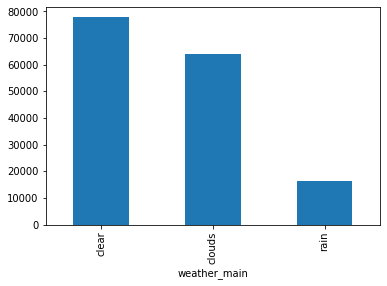

In [ ]:
df.groupby('weather_main').size().plot(kind='bar')
plt.show()

Il dataset è sbilanciato rispetto la classe da predirre

###2. Le rilevazioni con pressione e umidità uguale a 0 sono irreali. Quante sono queste rilevazioni?

In [ ]:
#rilevazioni con pressione E umidità uguale a 0 
df[np.logical_and(df.pressure == 0, df.humidity == 0)].shape[0]

0

In [ ]:
#rilevazioni con pressione O umidità uguale a 0 
df[np.logical_or(df.pressure == 0, df.humidity == 0)].shape[0]

61

Eliminarle dal dataset (punti 1)

In [ ]:
data = df.drop(index=df[np.logical_or(df.pressure == 0, df.humidity == 0)].index)
data.shape

(158069, 17)

In [ ]:
df.shape

(158130, 17)

###3. Analizzare la temperatura massima rilevata. Valutare se la distribuzione dei valori assume un andamento simile a una gaussiana. 



In [ ]:
max_temps = data.temp_max

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


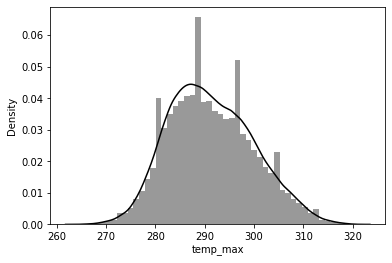

In [ ]:
plt.figure()
sns.distplot(max_temps, color='k')

L'andamento è simile ad una gaussiana, a parte qualche regione di valori che è più frequente

Considerare poi le rilevazioni che si collocano all’interno del 5% delle temperature più alte. Le città sono equamente presenti in quella fascia di rilevazioni?

In [ ]:
max_temps = data.temp_max
top5_temps = data[max_temps >= max_temps.quantile(0.95)]

In [ ]:
top5_temps.groupby('city_name').size()

city_name
 Barcelona     629
Bilbao         391
Madrid        2181
Seville       5297
Valencia       614
dtype: int64

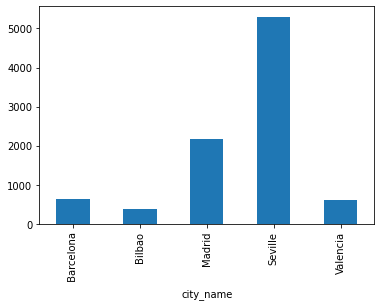

In [ ]:
top5_temps.groupby('city_name').size().plot.bar()

Siviglia e Madrid sono le città dove ci sono state più rilevazione di temperature massime.
Le città non sono equamente presenti in questa fascia di rilevazioni

Come è il tempo complessivo nei giorni in cui la temperatura massima è in quella fascia per ogni
città? (punti 4)

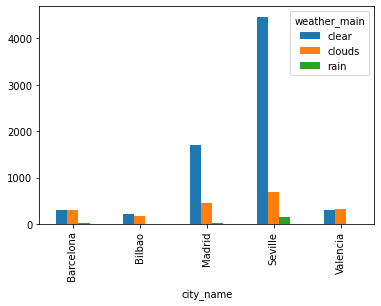

In [ ]:
top5_temps.groupby(['city_name','weather_main']).size().unstack().plot.bar()

Come era previsto, il tempo è soleggiato o nuvoloso nella maggior parte dei casi in tutte le città che hanno temperatura massima superiore/uguale al novantacinquesimo percentile

###4. Verificare se quando nevica la temperatura sia prossima alla temperatura di congelamento
(NOTA: il dataset riporta i valori in Kelvin) (punti 2)

In [ ]:
#0°C = 273,15K cerchiamo valori di temp intorno ai 273,15K

In [ ]:
data.weather_main.unique()

array(['clouds', 'clear', 'rain'], dtype=object)

In [ ]:
data.weather_description.unique()

array(['broken clouds', 'sky is clear', 'shower rain', 'moderate rain',
       'scattered clouds', 'few clouds', 'light rain',
       'heavy intensity rain', 'overcast clouds',
       'light intensity shower rain', 'very heavy rain',
       'proximity shower rain', 'heavy intensity shower rain',
       'proximity moderate rain', 'ragged shower rain'], dtype=object)

In [ ]:
data.snow_3h.unique()

array([0.0000e+00, 2.7460e+00, 2.0000e-01, 2.0900e+01, 5.5000e-01,
       8.4000e+00, 7.0000e-01, 1.0000e-01, 5.0000e-02, 9.3000e-02,
       8.5000e-01, 1.7000e+01, 2.8990e+00, 1.1000e+00, 4.0000e-01,
       6.2500e-01, 2.1500e+01, 3.2000e+00, 6.0000e-01, 2.5000e-02,
       1.0000e-02, 1.0490e+00, 7.4000e+00, 4.5000e-01, 2.7000e+00,
       1.2500e+01, 2.8000e-02, 1.2500e-01, 1.1250e+00, 7.3750e+00,
       1.2500e+00, 7.5000e-01, 7.2500e+00, 2.4300e-01, 1.3200e+01,
       2.9000e+00, 1.9900e+01, 4.9000e+00, 3.3400e-01, 2.6250e+00,
       2.5000e-01, 2.8000e+00, 6.1000e+00, 1.4390e+00, 1.2000e+00,
       1.7500e+00, 4.8000e+00, 1.5875e+01, 1.1870e+00, 1.2900e-01,
       8.0000e+00, 1.0000e-03, 7.0000e+00, 8.5000e+00, 2.8560e+00,
       6.3750e+00, 5.0000e-01, 8.9000e+00, 3.9000e+00])

In [ ]:
data.snow_3h.describe()

count    158069.000000
mean          0.004828
std           0.229148
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.500000
Name: snow_3h, dtype: float64

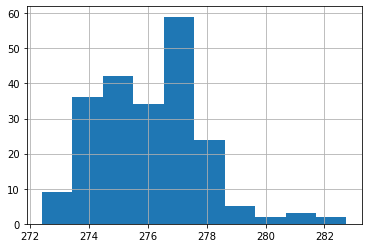

In [ ]:
data[data.snow_3h > 0].temp.hist()

La maggior parte delle temperature quando nevicaa è vicina ai 273,15 gradi kelvin

In [ ]:
data[data.snow_3h > 0].temp.mean()

276.11875101273137

In [ ]:
#la temperatura media quando nevica è di soli 3 gradi superiore dello zero celsius (273,15 K)

###5. Confrontare l’escursione termica media (temp_max-temp_min) registrata nei giorni in cui nevica, con quella delle giornate che sono all’interno del 5% delle temperature più alte (punti 2)


In [ ]:
snow_data = data[data.snow_3h > 0]
snow_data['deltat'] = snow_data.temp_max - snow_data.temp_min
snow_data.deltat.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.0

L'escursione termica media nei giorni di neve è zero (???)

In [ ]:
top5_temps = data[max_temps >= max_temps.quantile(0.95)]
top5_temps['deltat'] = top5_temps.temp_max - top5_temps.temp_min
top5_temps.deltat.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7.372107111501318

Nelle giornate all'interno del 5% delle temperature massime, l'escursione termica media è pari a 7,3 gradi Kelvin

#Parte 2: Trasformazione e Predizione (20 punti)






##1
Si vuole predire il valore di 'weather_main' sulla base degli attributi presenti nel dataset.
Dividere il dataset in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e
1/3 nel dataset “test”.
Eliminare gli attributi ["dt_iso","city_name","weather_description", "weather_icon","weather_id",
"clouds_all"]
Convertire l’attributo 'weather_main' in numerico in maniera opportuna.
Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello Logistic Regression. Effettuare alcune considerazioni sui risultati
ottenuti, tenendo in considerazione anche l’analisi della confusion matrix. (punti 4)

to_remove = ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all"]

In [ ]:
dataset = data.copy()
to_remove = ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all"]
dataset.shape

(158069, 17)

In [ ]:
dataset.drop(columns=to_remove, inplace=True)
dataset.shape

(158069, 11)

In [ ]:
classes = dataset.weather_main.unique().tolist()

In [ ]:
classes

['clouds', 'clear', 'rain']

In [ ]:
len(classes)

3

In [ ]:
dataset = dataset.replace(classes,np.arange(len(classes)))
dataset.weather_main.unique()

array([0, 1, 2])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.tree import DecisionTreeClassifier


In [ ]:
#creazione matrice di features e vettore di label
X = dataset.drop(columns='weather_main')
y = dataset['weather_main']

In [ ]:
print(X)
print(y)

           temp  temp_min  temp_max  ...  rain_1h  rain_3h  snow_3h
0       288.420   285.150   290.930  ...      0.0      0.0      0.0
1       299.037   299.037   299.037  ...      0.0      0.0      0.0
2       285.150   285.150   285.150  ...      0.0      0.0      0.0
3       289.150   289.150   289.150  ...      0.9      0.0      0.0
4       279.940   279.150   281.150  ...      0.0      0.0      0.0
...         ...       ...       ...  ...      ...      ...      ...
158126  297.760   293.710   305.050  ...      0.0      0.0      0.0
158127  292.830   291.150   294.150  ...      0.0      0.0      0.0
158128  292.810   292.810   292.810  ...      0.0      0.0      0.0
158129  285.220   285.220   285.220  ...      0.0      0.0      0.0
158130  287.761   287.761   287.761  ...      0.3      0.0      0.0

[158069 rows x 10 columns]
0         0
1         1
2         0
3         2
4         1
         ..
158126    1
158127    1
158128    1
158129    1
158130    2
Name: weather_main, Leng

Test Set Results
Confusion Matrix:
 [[13557  7812     1]
 [ 7968 17939     0]
 [    0     0  5413]]


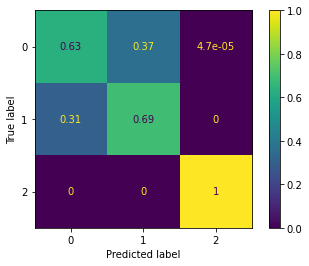


Accuracy: 0.7004934522679825 

Train Set Results
Confusion Matrix:
 [[42704    37     0]
 [  288 51524     0]
 [    0     0 10826]]


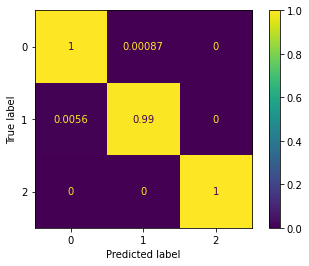


Accuracy: 0.9969158940585885 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=1/3,train_size=2/3 , stratify=dataset['weather_main'],random_state=0)
#strategia stratificata dato il dataset sbilanciato

model = DecisionTreeClassifier()

model.fit(X_train,y_train)

#matrice di confusione ed accuracy sul test set

predict = model.predict(X_test)

print("Test Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

#matrice di confusione ed accuracy sul train set

predict = model.predict(X_train)

print("Train Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

il modello su train predice molto bene la classe 2(rain).
Si nota dell'overfitting dato la discrepanza delle accuracy su train e test
Per questo motivo sarebbe consigliabile ridurre la profondità massima del decision tree e rivalutare il modello

In [ ]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Set Results
Confusion Matrix:
 [[10615 10441   314]
 [ 6894 18641   372]
 [ 3412  1113   888]]


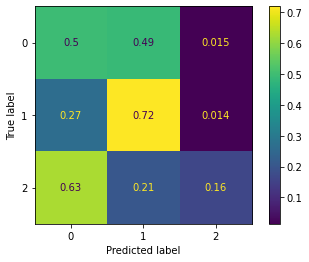


Accuracy: 0.5721009679256026 

Train Set Results
Confusion Matrix:
 [[21188 20903   650]
 [13789 37354   669]
 [ 6773  2277  1776]]


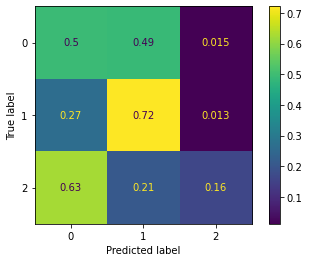


Accuracy: 0.5723910836124845 



In [ ]:
#VALUTAZIONE CON LOGISTIC REGRESSION 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=1/3,train_size=2/3 , stratify=dataset['weather_main'],random_state=0)
#strategia stratificata dato il dataset sbilanciato

model = LogisticRegression(solver='lbfgs',max_iter=300)

model.fit(X_train,y_train)

#matrice di confusione ed accuracy sul test set

predict = model.predict(X_test)

print("Test Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

#matrice di confusione ed accuracy sul train set

predict = model.predict(X_train)

print("Train Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

Il modello Logisticv Regression ha performance molto peggiori rispetto il decision tree classifier ma non mostra segni di overfitting (score di accuracy simile tra train e test)
Analizzando la confusion matrix, e dato il mancato preprocessing dei dati, il modello fatica a predirre correttamente le classi 0 e 2
confondendo la classe 2 con la 0 nel 60% dei casi. Si nota che la confusion matrix tra train e test non varia di molto.

##2
Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza che si ottiene con
un una 10 Fold cross validation. (punti 1)

In [ ]:
X = dataset.drop(columns='weather_main')
y = dataset['weather_main']

model = DecisionTreeClassifier()

cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())

Results:
 [0.71265895 0.7087999  0.70816727 0.71493642 0.71348137 0.71322832
 0.70823053 0.71038148 0.70734485 0.70492218] 
Mean Accuracy: 0.7102151257176026 
Accuracy STD:  0.0030729008582738894


L'accuracy che si ottiene con la 10 fold cross validation è leggermente migliore rispetto quella ottenuta al punto 1 (decision tree)

##3
Utilizzare la funzione Normalizer per normalizzare i valori del dataset e confrontare se
l’accuratezza ottenuta con il Decision Tree Classifier migliora (punti 3).

In [ ]:
from sklearn.preprocessing import Normalizer

X = dataset.drop(columns='weather_main')
y = dataset['weather_main']

normaliz = Normalizer()
X_norm = normaliz.fit_transform(X)

model = DecisionTreeClassifier()

cv_results = cross_val_score(model, X_norm, y, cv=10, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())

Results:
 [0.69298412 0.69500854 0.69684317 0.69178212 0.69469222 0.69779212
 0.68861897 0.69690643 0.69051686 0.69517905] 
Mean Accuracy: 0.6940323602141198 
Accuracy STD:  0.002842990038029896


Risultati precedenti con 10 fold cv
Mean Accuracy: 0.7097533182134257 
Accuracy STD:  0.002965294814050451

Le performance sono leggermente degradate, con accuracy minore e deviazione standard più alta:

Mean Accuracy: 0.6942031706145754 
Accuracy STD:  0.0033887192627256443



##4
Creare una pipeline con trasformatori PCA (si scelgano 5 attributi) e poi Normalizer. Si usi
come modello il Decision Tree Classifier (punti 2) [2 punti ulteriori se gli attributi della PCA
sono aggiunti agli attributi del dataset]

[Pipeline] .......... (step 1 of 3) Processing combined, total=   0.2s
[Pipeline] ........ (step 2 of 3) Processing normalizer, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   2.6s

Accuracy Score: 0.6977984437274625 



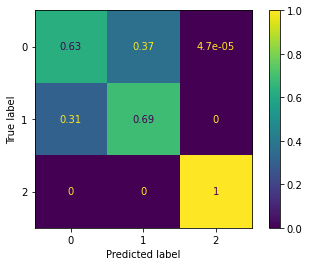


Accuracy Score: 0.9969158940585885 



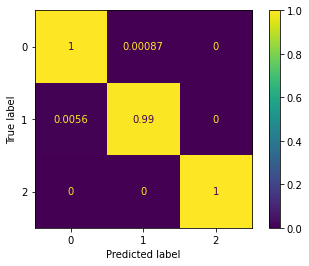

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA


X = dataset.drop(columns='weather_main')
y = dataset['weather_main']


pca = PCA(n_components=5)

def identity_func(X):
  return X

combined = FeatureUnion([("pca", pca),('passtrough',FunctionTransformer(identity_func,validate=False))])
#creo 5 colonne con pca unite al dataset originale, tramite una funzione identità con FunctionTransformer

norm = Normalizer()

model = DecisionTreeClassifier()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('combined', combined),
                              ('normalizer',norm),
                              ('model', model)
                             ], verbose = True)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/3,
                                                    train_size=2/3 ,
                                                    stratify=dataset['weather_main'],
                                                    random_state=0)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model on test
score = accuracy_score(y_test, preds)
print('\nAccuracy Score:', score,"\n")

plot_confusion_matrix(my_pipeline, X_test, y_test, normalize='true')
plt.show() 

# Evaluate the model on train
preds = my_pipeline.predict(X_train)

score = accuracy_score(y_train, preds)
print('\nAccuracy Score:', score,"\n")

plot_confusion_matrix(my_pipeline, X_train, y_train, normalize='true')
plt.show()

Nonostante il processing effettuato il modello non è migliorato e presenta ancora overfitting sul train set. La matrice di confusione non è di molto differente dal modello del punto 1

##5
Utilizzare la funzione di gridSearchCV sulla pipeline per modificare il numero di attributi
selezionati dalla PCA e alcuni parametri a piacere del classificatore. Verificare se l’accuratezza
che si ottiene con la nuova configurazione supera quella standard ottenuta al punto 1 (punti 4)

In [ ]:
X = dataset.drop(columns='weather_main')
y = dataset['weather_main']


pca = PCA(n_components=5)

def identity_func(X):
  return X

combined = FeatureUnion([("pca", pca),('passtrough',FunctionTransformer(identity_func,validate=False))])
#creo 5 colonne con pca unite al dataset originale, tramite una funzione identità con FunctionTransformer

norm = Normalizer()

model = DecisionTreeClassifier()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('combined', combined),
                              ('normalizer',norm),
                              ('model', model)
                             ], verbose = True)

from sklearn.model_selection import GridSearchCV

parameters = {
    'combined__pca__n_components':[2,3,5],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [4,6,10],
}

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/3,
                                                    train_size=2/3 ,
                                                    stratify=dataset['weather_main'],
                                                    random_state=0)

gs_clf = GridSearchCV(my_pipeline, parameters,  cv=5, n_jobs=-1)
gs_clf.fit(X_train, y_train)

gs_clf.best_params_

my_pipeline.set_params(**gs_clf.best_params_)
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model on test
score = accuracy_score(y_test, preds)
print('Accuracy Score on test:', score)

# Evaluate the model train
score = accuracy_score(y_train, my_pipeline.predict(X_train))
print('Accuracy Score on train:', score)


[Pipeline] .......... (step 1 of 3) Processing combined, total=   0.3s
[Pipeline] ........ (step 2 of 3) Processing normalizer, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.3s
[Pipeline] .......... (step 1 of 3) Processing combined, total=   0.2s
[Pipeline] ........ (step 2 of 3) Processing normalizer, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.4s
Accuracy Score on test: 0.6513949516037199
Accuracy Score on train: 0.6690422190379487


In [ ]:
print(gs_clf.best_params_) #parametri migliori scelti

{'combined__pca__n_components': 5, 'model__max_depth': 10, 'model__max_features': 'auto'}



Accuracy Score: 0.6513949516037199 



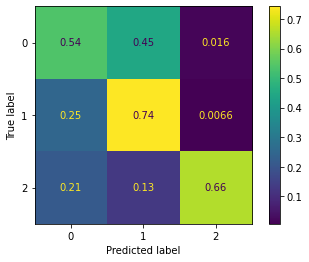


Accuracy Score: 0.6690422190379487 



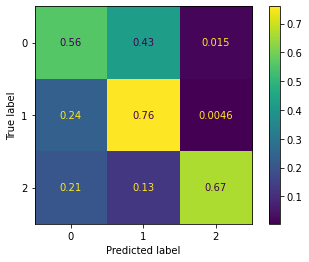

In [ ]:
# Evaluate the model on test
score = accuracy_score(y_test, preds)
print('\nAccuracy Score:', score,"\n")

plot_confusion_matrix(my_pipeline, X_test, y_test, normalize='true')
plt.show() 

# Evaluate the model on train
preds = my_pipeline.predict(X_train)

score = accuracy_score(y_train, preds)
print('\nAccuracy Score:', score,"\n")

plot_confusion_matrix(my_pipeline, X_train, y_train, normalize='true')
plt.show()

 **Le performance sulla classe 1 sono migliorate mentre per la classe 0 sono leggermente peggiorate.
Il modello ha peggiorato lievemente con lo score di accuracy ma è di molto migliorato per quanto riguarda l'overfitting**


##6
Si verifichi l’accuratezza ottenuta dalla pipeline del punto 4 con il file weather_test. I
risultati corretti sono nel file class.csv. Controllare le features presenti nei dataset. (punti 2).


In [ ]:
test = pd.read_csv("/content/weather_test.csv")

In [ ]:
test.head()

,Unnamed: 0,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description,weather_icon
0,0,2015-10-23 18:00:00+02:00,Madrid,293.150,293.150,293.150,1019,45,2,200,0.0,0.0,0.0,0,800,sky is clear,01d
1,1,2015-01-01 06:00:00+01:00,Madrid,265.442,265.442,265.442,972,64,0,240,0.0,0.0,0.0,0,800,sky is clear,01n
2,2,2015-07-24 22:00:00+02:00,Madrid,302.870,301.050,304.150,1012,29,6,290,0.0,0.0,0.0,0,800,sky is clear,01n
3,3,2015-05-27 22:00:00+02:00,Madrid,291.944,291.944,291.944,956,34,3,29,0.0,0.0,0.0,0,800,sky is clear,01n
4,4,2015-07-06 18:00:00+02:00,Madrid,312.540,310.650,313.150,1017,11,5,220,0.0,0.0,0.0,20,801,few clouds,02d


In [ ]:
test[test.isna().any(axis=1)]

,Unnamed: 0,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description,weather_icon


In [ ]:
to_remove = ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all"]

In [ ]:
test = test.drop(columns=to_remove)

In [ ]:
test = test.iloc[:,1:]

In [ ]:
label = pd.read_csv("/content/class.csv")
label.head()

,Unnamed: 0,weather_main
0,0,clear
1,1,clear
2,2,clear
3,3,clear
4,4,clouds


In [ ]:
label = label['weather_main']
classes = label.unique().tolist()

In [ ]:
classes

['clear', 'clouds', 'rain']

In [ ]:
label = label.replace({'clear':0,'clouds':1,'rain': 2})
label.unique()

array([0, 1, 2])

In [ ]:
X_test = test
y_test = label


Accuracy Score on test: 0.3735 



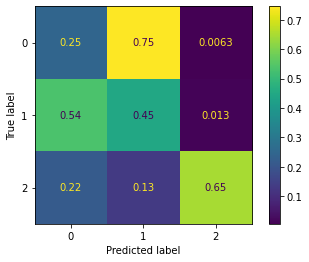

In [ ]:
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)


# Evaluate the model on test
score = accuracy_score(y_test, preds)
print('\nAccuracy Score on test:', score,"\n")

plot_confusion_matrix(my_pipeline, X_test, y_test, normalize='true')
plt.show() 

Il modello ha peggiori performance sul dataset test, soprattuto per quanto riguarda le classi 0 ed 1, probabilmente perchè era presente dell'overfitting ed il dataset usato per il training è bilanciato in modo diverso da quello test

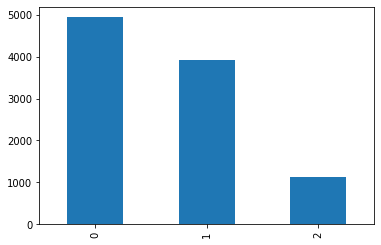

In [ ]:
label.value_counts().plot.bar()

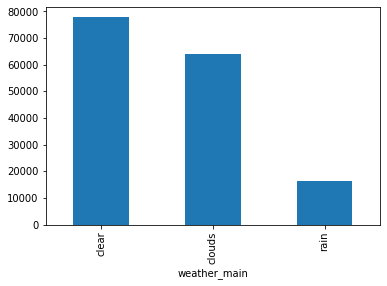

In [ ]:
df.groupby('weather_main').size().plot(kind='bar')
plt.show()

Il dataset non è, come supposto prima, sbilanciato diversamente da quello usato per allenare il modello.
La probabile causa della degradazione delle performance è la poca generalizzazione del modello/ dati diversi dal dataset di train

##7
Si sperimenti una pipeline come quella del punto 4 dove al posto del classificatore si utilizzi
un regressore lineare. Il risultato dovrà essere approssimato all’intero per il calcolo
dell’accuratezza (punti 2).

In [99]:
from sklearn.linear_model import Ridge

X = dataset.drop(columns='weather_main')
y = dataset['weather_main']


In [100]:
pca = PCA(n_components=5)

def identity_func(X):
  return X

combined = FeatureUnion([("pca", pca),('passtrough',FunctionTransformer(identity_func,validate=False))])
#creo 5 colonne con pca unite al dataset originale, tramite una funzione identità con FunctionTransformer

norm = Normalizer()

model = Ridge()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('combined', combined),
                              ('normalizer',norm),
                              ('model', model)
                             ], verbose = True)

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    test_size=1/3,
                                                    train_size=2/3 ,
                                                    stratify=dataset['weather_main'],
                                                    random_state=0)


my_pipeline.fit(X_train, y_train)

print("\nEVALUATION OF WEATHER_TRAIN DATASET\n")
#EVALUATION ON TRAIN PART OF WEATHER TRAIN

preds = np.round(np.clip(my_pipeline.predict(X_train), 0,2))
print("\ntrain preds:",preds)

score = accuracy_score(y_train, preds)
print('\nAccuracy Score on TEST:', score,"\n")

print("Confusion Matrix:\n", confusion_matrix(y_train, preds))

#EVALUATION ON VALID PART OF WEATHER TRAIN

preds = np.round(np.clip(my_pipeline.predict(X_valid), 0,2))
#NP.CLIP: se vado fuori dall'intervallo [0,2], sostituisco 0 o 2 a seconda di dove ho "sforato" (numero>2 o <0)
print("\nvalid preds:",preds)

score = accuracy_score(y_valid, preds)
print('\nAccuracy Score on TEST:', score,"\n")
print("Confusion Matrix:\n", confusion_matrix(y_valid, preds))

print("----------------------------------------------------")

#EVALUATION ON WEATHER TEST
print("\nEVALUATION OF WEATHER_TRAIN DATASET\n")

X_test = test
y_test = label

preds = np.round(np.clip(my_pipeline.predict(X_test), 0,2))
print("\nfinal test preds:",preds)

score = accuracy_score(y_test, preds)
print('\nAccuracy Score on TEST:', score,"\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


[Pipeline] .......... (step 1 of 3) Processing combined, total=   0.2s
[Pipeline] ........ (step 2 of 3) Processing normalizer, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.0s

EVALUATION OF WEATHER_TRAIN DATASET


train preds: [1. 1. 1. ... 1. 1. 1.]

Accuracy Score on TEST: 0.491672913958189 

Confusion Matrix:
 [[    2 42739     0]
 [    2 51810     0]
 [    1 10825     0]]

valid preds: [1. 1. 1. ... 1. 1. 1.]

Accuracy Score on TEST: 0.4916872271778326 

Confusion Matrix:
 [[    0 21370     0]
 [    0 25907     0]
 [    0  5413     0]]
----------------------------------------------------

EVALUATION OF WEATHER_TRAIN DATASET


final test preds: [1. 1. 1. ... 1. 1. 1.]

Accuracy Score on TEST: 0.3927 

Confusion Matrix:
 [[   2 4933    0]
 [   0 3925    0]
 [   0 1140    0]]


In [101]:
print(my_pipeline.predict(X_train))

[0.70632662 0.66414644 0.69332462 ... 0.75992947 0.69101139 0.79647055]


In [102]:
print(my_pipeline.predict(X_valid))

[0.69763049 0.68910672 0.73543409 ... 0.69542962 0.70895996 0.71888694]


In [103]:
print(my_pipeline.predict(X_test))

[0.65117613 0.86873584 0.61190308 ... 0.68482142 0.71696325 0.72423773]


I risultati del modello sono scarsi in quanto la maggior parte dei valori di regressione si attesta intorno al 0.6 - 0.7 e quindi viene arrotondato alla classe 1. Probabilmente un dummy classifier otterrebbe un'accuracy migliore

In [104]:
#Provo ad aggiungere uno standard scaler
from sklearn.preprocessing import StandardScaler

In [106]:
pca = PCA(n_components=5)

def identity_func(X):
  return X

combined = FeatureUnion([("pca", pca),('passtrough',FunctionTransformer(identity_func,validate=False))])
#creo 5 colonne con pca unite al dataset originale, tramite una funzione identità con FunctionTransformer

norm = Normalizer()
scaler = StandardScaler()
model = Ridge()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('combined', combined),
                              ('scaler', scaler),
                              ('normalizer',norm),
                              ('model', model)
                             ], verbose = True)

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    test_size=1/3,
                                                    train_size=2/3 ,
                                                    stratify=dataset['weather_main'],
                                                    random_state=0)


my_pipeline.fit(X_train, y_train)

print("\nEVALUATION OF WEATHER_TRAIN DATASET\n")
#EVALUATION ON TRAIN PART OF WEATHER TRAIN

preds = np.round(np.clip(my_pipeline.predict(X_train), 0,2))
print("\ntrain preds:",preds)

score = accuracy_score(y_train, preds)
print('\nAccuracy Score on TEST:', score,"\n")

print("Confusion Matrix:\n", confusion_matrix(y_train, preds))

#EVALUATION ON VALID PART OF WEATHER TRAIN

preds = np.round(np.clip(my_pipeline.predict(X_valid), 0,2))
#NP.CLIP: se vado fuori dall'intervallo [0,2], sostituisco 0 o 2 a seconda di dove ho "sforato" (numero>2 o <0)
print("\nvalid preds:",preds)

score = accuracy_score(y_valid, preds)
print('\nAccuracy Score on TEST:', score,"\n")
print("Confusion Matrix:\n", confusion_matrix(y_valid, preds))

print("----------------------------------------------------")

#EVALUATION ON WEATHER TEST
print("\nEVALUATION OF WEATHER_TRAIN DATASET\n")

X_test = test
y_test = label

preds = np.round(np.clip(my_pipeline.predict(X_test), 0,2))
print("\nfinal test preds:",preds)

score = accuracy_score(y_test, preds)
print('\nAccuracy Score on TEST:', score,"\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


[Pipeline] .......... (step 1 of 4) Processing combined, total=   0.2s
[Pipeline] ............ (step 2 of 4) Processing scaler, total=   0.0s
[Pipeline] ........ (step 3 of 4) Processing normalizer, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing model, total=   0.0s

EVALUATION OF WEATHER_TRAIN DATASET


train preds: [1. 0. 0. ... 1. 0. 1.]

Accuracy Score on TEST: 0.5983640004175405 

Confusion Matrix:
 [[14406 28335     0]
 [ 7520 44292     0]
 [    0  6469  4357]]

valid preds: [1. 1. 1. ... 0. 1. 1.]

Accuracy Score on TEST: 0.5954070981210856 

Confusion Matrix:
 [[ 7150 14219     1]
 [ 3868 22039     0]
 [    0  3230  2183]]
----------------------------------------------------

EVALUATION OF WEATHER_TRAIN DATASET


final test preds: [1. 1. 1. ... 0. 1. 1.]

Accuracy Score on TEST: 0.3834 

Confusion Matrix:
 [[ 705 4230    0]
 [1290 2635    0]
 [   0  646  494]]


I risultati su weather train sono migliorati ma vista la diversa distribuzione, i risultati su weather test sono rimasti scarsi